In [0]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Iris_external.csv')
print("10 randon rows from sample")
df.sample(10)

10 randon rows from sample


,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
89,5.5,2.5,4.0,1.3,Iris-versicolor
91,6.1,3.0,4.6,1.4,Iris-versicolor
14,5.8,4.0,1.2,0.2,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa
138,6.0,3.0,4.8,1.8,Iris-virginica
36,5.5,3.5,1.3,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
145,6.7,3.0,5.2,2.3,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [11]:
print("Estimate of missing values")
print(df.isnull().sum())
print("No missing values")

Estimate of missing values
Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64
No missing values


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [13]:
from sklearn.preprocessing import LabelEncoder
df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
number = LabelEncoder()
df.Class = number.fit_transform(df.Class.astype('str'))
df.sample(10) #verification if change is successfull


,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
128,6.4,2.8,5.6,2.1,2
59,5.2,2.7,3.9,1.4,1
137,6.4,3.1,5.5,1.8,2
127,6.1,3.0,4.9,1.8,2
66,5.6,3.0,4.5,1.5,1
39,5.1,3.4,1.5,0.2,0
16,5.4,3.9,1.3,0.4,0
45,4.8,3.0,1.4,0.3,0
47,4.6,3.2,1.4,0.2,0
91,6.1,3.0,4.6,1.4,1


In [16]:
df.dtypes #checking the dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                     int64
dtype: object

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [36]:
dummy = df.corr().abs() #abs used so that only one ended check can be enough
dummy

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),0.109369,1.000000,0.420516,0.356544,0.419446
Petal length (in cm),0.871754,0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,0.356544,0.962757,1.000000,0.956464
Class,0.782561,0.419446,0.949043,0.956464,1.000000


In [117]:
index = dummy.loc[dummy['Class'] <=0.1] #getting row index of of those with correlation less than 0.1 (absolute values)
index

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class


In [118]:
df_dummy = dummy.loc[(dummy.Class<=0.1),['Class']].count()   #counting number of variables with correlation less than 0.1
print("Variables from feature set having correlation in range -0.1 to 0.1 with target variable Class")
print(df_dummy)

Variables from feature set having correlation in range -0.1 to 0.1 with target variable Class
Class    0
dtype: int64


In [119]:
print("Number variables between range -0.1 to 0.1 with target variable ", df_dummy)
print("Nothing to drop")

Number variables between range -0.1 to 0.1 with target variable  Class    0
dtype: int64
Nothing to drop


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [136]:
variance = df.var()
count = 0
for x in variance:
    if (x<0.1):
        count = count + 1
if (count==0):
    print("Nothing to drop as all variables have variance more than 0.1 ")

    
variance

Nothing to drop as all variables have variance more than 0.1 


Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a230be6a0>,
      dtype=object)

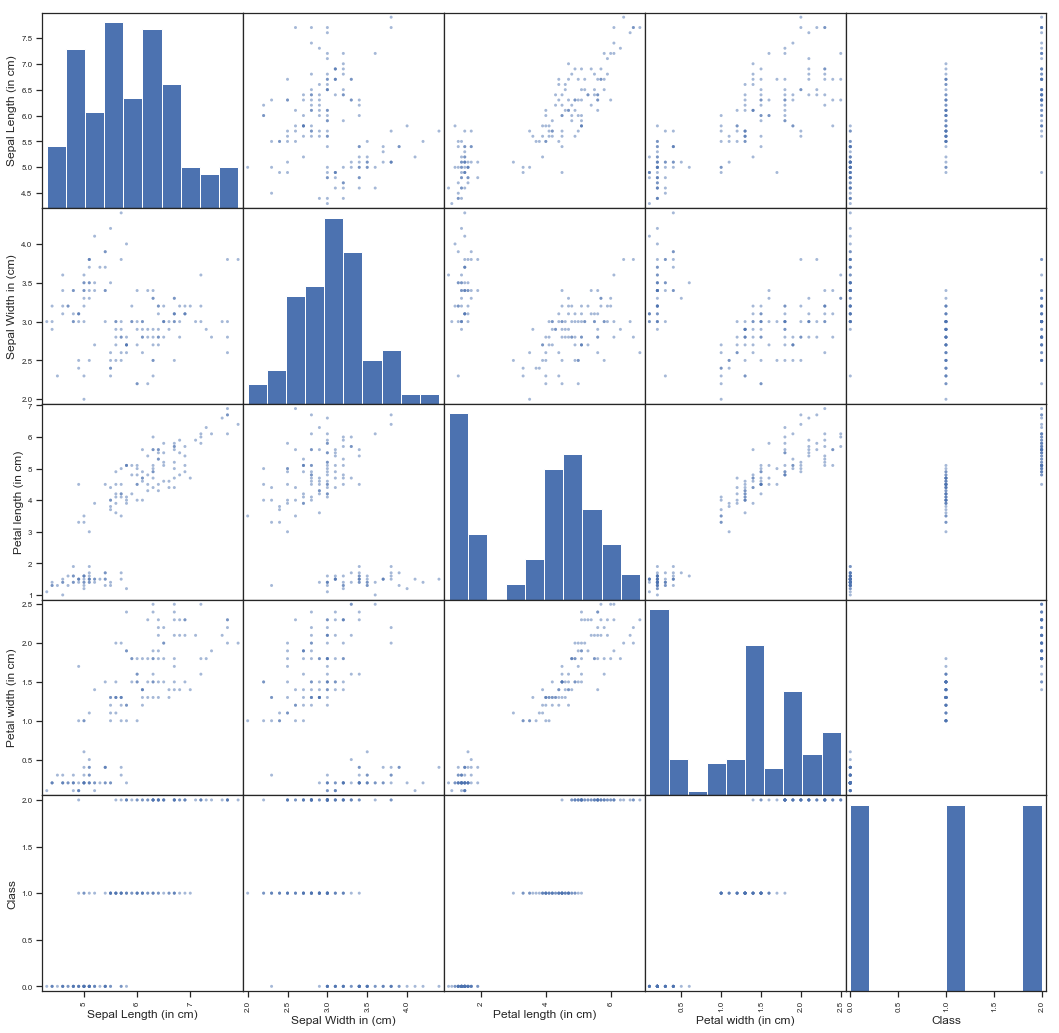

In [139]:
pd.plotting.scatter_matrix(df,figsize = (18,18))

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [82]:
X=df.drop('Class',axis=1) #independent variable
y=df['Class'] #depending variable
print(X.sample(3))
print(y.sample(3))

     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
146                   6.3                  2.5                   5.0   
103                   6.3                  2.9                   5.6   
141                   6.9                  3.1                   5.1   

     Petal width (in cm)  
146                  1.9  
103                  1.8  
141                  2.3  
5     0
56    1
77    1
Name: Class, dtype: int64


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0) #splitting data
#verification of split
print("Shape of original data set")
print(X.shape)
print("Shape of train data set (independent)")
print(X_train.shape)
print("Shape of train data set (dependent)")
print(y_train.shape)
print("Shape of test data set (dependent)")
print(y_test.shape)

Shape of original data set
(150, 4)
Shape of train data set (independent)
(120, 4)
Shape of train data set (dependent)
(120,)
Shape of test data set (dependent)
(30,)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
k_range = [3,5,9]
report_train = []
report_test = []
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
#scaledY_train = sc.fit_transform(y_train)
#scaledY_test = sc.fit_transform(y_test)
for x in k_range:
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(scaledX_train, y_train)
    train_pred = knn.predict(scaledX_train)
    report_train.append(accuracy_score(y_train, train_pred))
    test_pred = knn.predict(scaledX_test)
    report_test.append(accuracy_score(y_test, test_pred))
    
result = pd.DataFrame(list(zip(k_range, report_train, report_test)), 
               columns =['K value', 'Train Accuracy','Test Accuracy']) 
result

,K value,Train Accuracy,Test Accuracy
0,3,0.966667,0.966667
1,5,0.958333,1.000000
2,9,0.966667,1.000000


## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [110]:
k_range = np.arange(1,20,2)
low_test_error =100 #initializing high value
k_best = 0
report_train = []
report_test = []
print("Error Values with K")
for x in k_range:
    knn=KNeighborsClassifier(n_neighbors=x)
    knn.fit(scaledX_train,y_train)
    train_pred = knn.predict(scaledX_train)
    report_train.append(1-accuracy_score(y_train, train_pred))
    test_pred = knn.predict(scaledX_test)
    report_test.append(1-accuracy_score(y_test, test_pred))
    print(x,1-accuracy_score(y_test, test_pred))
    if (1-accuracy_score(y_test, test_pred))<low_test_error:
        low_test_error = 1-accuracy_score(y_test, test_pred)
        k_best = x
       
print("Best model is with ", k_best, "nearest neeighbors")    

Error Values with K
1 0.033333333333333326
3 0.033333333333333326
5 0.0
7 0.0
9 0.0
11 0.0
13 0.0
15 0.0
17 0.0
19 0.033333333333333326
Best model is with  5 nearest neeighbors


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

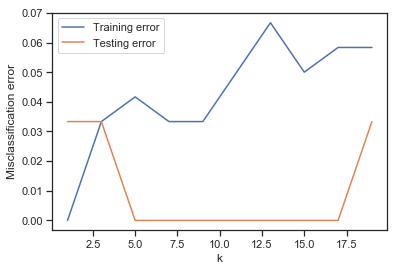

In [112]:
import matplotlib.pyplot as plt
plt.plot(k_range,report_train, label = "Training error")
plt.plot(k_range,report_test, label = "Testing error")
plt.legend(loc='upper left')
plt.ylabel('Misclassification error')
plt.xlabel('k')
plt.show()